In [ ]:
### Week 4 Assignment 
## Programmer's name: Xander Lee
## Los Angeles County data containing info on educational level and Service Planning Areas (SPAs)
## will be pulled and ran through several commands to conduct census data exploration in order to 
## produce bar charts and maps.

In [2]:
#importing pandas
import pandas as pd
import geopandas as gpd

In [9]:
#read data file
df = pd.read_csv('data/Transportation_to_work1.csv')

In [10]:
df.shape

(2498, 20)

In [12]:
#quick inspection
df = pd.read_csv(
    'data/Transportation_to_work1.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_GEOCOMP': str,
    
    }
)
df

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CS,Geo_PLACE,Geo_CT,Geo_CSA,SE_A09005_001,SE_A09005_002,SE_A09005_009,SE_A09005_010,SE_A09005_003,SE_A09005_004,SE_A09005_005,SE_A09005_006,SE_A09005_007,SE_A09005_008
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",0,06,037,NaN,NaN,101110,NaN,2043,1858,1712,146,49,16,0,12,2,106
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",0,06,037,NaN,NaN,101122,NaN,2014,1583,1460,123,17,0,0,0,78,336
2,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",0,06,037,NaN,NaN,101220,NaN,1665,1317,1229,88,91,0,0,31,111,115
3,06037101221,Census Tract 1012.21,"Census Tract 1012.21, Los Angeles County, Cali...",0,06,037,NaN,NaN,101221,NaN,1762,1561,1344,217,47,0,0,0,131,23
4,06037101222,Census Tract 1012.22,"Census Tract 1012.22, Los Angeles County, Cali...",0,06,037,NaN,NaN,101222,NaN,1105,972,943,29,36,0,0,59,12,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,06037980038,Census Tract 9800.38,"Census Tract 9800.38, Los Angeles County, Cali...",0,06,037,NaN,NaN,980038,NaN,0,0,0,0,0,0,0,0,0,0
2494,06037980039,Census Tract 9800.39,"Census Tract 9800.39, Los Angeles County, Cali...",0,06,037,NaN,NaN,980039,NaN,0,0,0,0,0,0,0,0,0,0
2495,06037990100,Census Tract 9901,"Census Tract 9901, Los Angeles County, California",0,06,037,NaN,NaN,990100,NaN,0,0,0,0,0,0,0,0,0,0
2496,06037990200,Census Tract 9902,"Census Tract 9902, Los Angeles County, California",0,06,037,NaN,NaN,990200,NaN,0,0,0,0,0,0,0,0,0,0


In [13]:
# look at the data types, verbose = True shows us the counts
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2498 non-null   object 
 1   Geo_NAME       2498 non-null   object 
 2   Geo_QName      2498 non-null   object 
 3   Geo_NATION     2498 non-null   int64  
 4   Geo_STATE      2498 non-null   object 
 5   Geo_COUNTY     2498 non-null   object 
 6   Geo_CS         0 non-null      float64
 7   Geo_PLACE      0 non-null      float64
 8   Geo_CT         2498 non-null   int64  
 9   Geo_CSA        0 non-null      float64
 10  SE_A09005_001  2498 non-null   int64  
 11  SE_A09005_002  2498 non-null   int64  
 12  SE_A09005_009  2498 non-null   int64  
 13  SE_A09005_010  2498 non-null   int64  
 14  SE_A09005_003  2498 non-null   int64  
 15  SE_A09005_004  2498 non-null   int64  
 16  SE_A09005_005  2498 non-null   int64  
 17  SE_A09005_006  2498 non-null   int64  
 18  SE_A0900

In [40]:
df.sample(5)

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CS,Geo_PLACE,Geo_CT,Geo_CSA,SE_A09005_001,SE_A09005_002,SE_A09005_009,SE_A09005_010,SE_A09005_003,SE_A09005_004,SE_A09005_005,SE_A09005_006,SE_A09005_007,SE_A09005_008
1591,06037501503,Census Tract 5015.03,"Census Tract 5015.03, Los Angeles County, Cali...",0,06,037,NaN,NaN,501503,NaN,2602,2272,1991,281,9,0,0,57,0,264
11,06037103101,Census Tract 1031.01,"Census Tract 1031.01, Los Angeles County, Cali...",0,06,037,NaN,NaN,103101,NaN,1482,1295,1116,179,0,0,4,0,5,178
170,06037121102,Census Tract 1211.02,"Census Tract 1211.02, Los Angeles County, Cali...",0,06,037,NaN,NaN,121102,NaN,1043,867,716,151,4,38,0,23,0,111
373,06037141700,Census Tract 1417,"Census Tract 1417, Los Angeles County, California",0,06,037,NaN,NaN,141700,NaN,1532,991,930,61,0,0,0,0,0,541
179,06037122120,Census Tract 1221.20,"Census Tract 1221.20, Los Angeles County, Cali...",0,06,037,NaN,NaN,122120,NaN,2065,1743,1188,555,115,0,0,23,21,163


In [41]:
#calculate the proportion of residents aged 16 above who are transit reliant across all census tracts, dividing number of transit reliant people by total in CT. 
df_mean=df['SE_A09005_003']/df['SE_A09005_001']

In [42]:
df_mean

0       0.023984
1       0.008441
2       0.054655
3       0.026674
4       0.032579
          ...   
2493         NaN
2494         NaN
2495         NaN
2496         NaN
2497         NaN
Length: 2498, dtype: float64

In [43]:
#calculate mean proportion of transit reliant people across all CTs
df_mean.mean()

0.05243500429493074

In [44]:
df_mean.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2498 entries, 0 to 2497
Series name: None
Non-Null Count  Dtype  
--------------  -----  
2471 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB


In [47]:
#sort the data based on number of residents who are transit reliant, showing the most transit reliant areas first
df_sorted = df.sort_values(by='SE_A09005_003', ascending = False)
df_sorted[['SE_A09005_003']].head(10)

,SE_A09005_003
632,1280
622,1167
611,915
618,907
631,811
633,781
662,707
486,706
657,665
684,662


<Axes: title={'center': '10 Most Transit-reliant Census Tracts in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)', ylabel='number of residents reliant on public transit'>

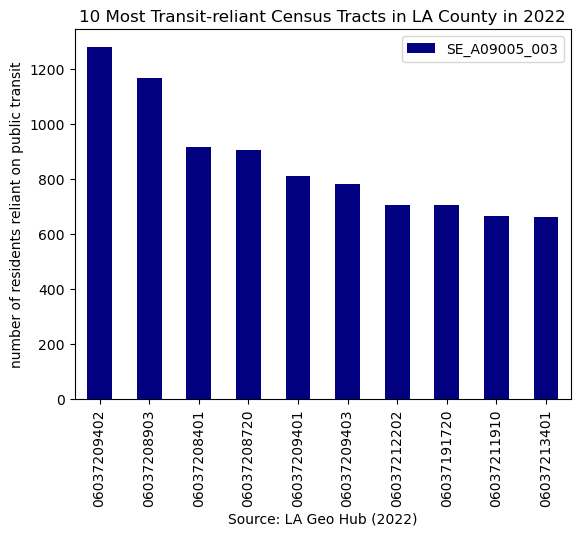

In [49]:
df_sorted.head(10).plot.bar(x='Geo_FIPS',
                             y='SE_A09005_003',
                             title='10 Most Transit-reliant Census Tracts in LA County in 2022',
                             color='navy',
                            ylabel='number of residents reliant on public transit',
                            xlabel='Source: LA Geo Hub (2022)')

In [51]:
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [55]:
map=gpd.read_file('data/Census_Tracts_2020.geojson')
map.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [56]:
# Only really need FIPS and geometry, so let's subset the data
map = map[['CT20','geometry']]
map.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [65]:
# create a tract column
map['Geo_FIPS'] ='06' + '037' + map['CT20']

In [66]:
# check it!
map.head()

,CT20,geometry,tract,Geo_FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,06037101222


In [67]:
# creating a new dataframe based on the join
df_2=map.merge(df,on="Geo_FIPS")

In [68]:
df_2.head()

,CT20,geometry,tract,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CS,...,SE_A09005_001,SE_A09005_002,SE_A09005_009,SE_A09005_010,SE_A09005_003,SE_A09005_004,SE_A09005_005,SE_A09005_006,SE_A09005_007,SE_A09005_008
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",0,06,037,NaN,...,2043,1858,1712,146,49,16,0,12,2,106
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",0,06,037,NaN,...,2014,1583,1460,123,17,0,0,0,78,336
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",0,06,037,NaN,...,1665,1317,1229,88,91,0,0,31,111,115
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,06037101221,Census Tract 1012.21,"Census Tract 1012.21, Los Angeles County, Cali...",0,06,037,NaN,...,1762,1561,1344,217,47,0,0,0,131,23
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,06037101222,Census Tract 1012.22,"Census Tract 1012.22, Los Angeles County, Cali...",0,06,037,NaN,...,1105,972,943,29,36,0,0,59,12,26


<Axes: >

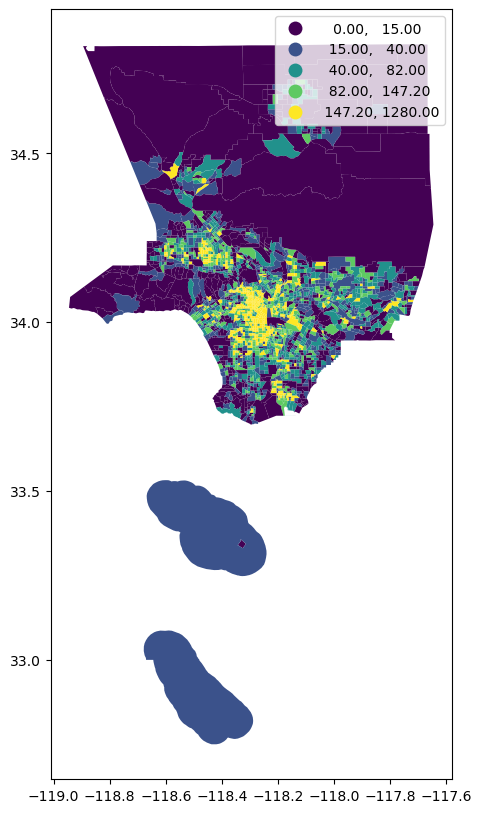

In [73]:
df_2.plot(figsize=(12,10),
                 column='SE_A09005_003',
                 legend=True, 
                 scheme='quantiles')

In [74]:
# This map shows that residents in the metro city area of LA have the highest number of 
# people who are reliant on public transit as their main means of transportation.


In [ ]:
### END OF ASSIGNMENT 3 ###